In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [2]:
digits = load_digits()

In [3]:
# From here done from codebasics 
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]# this a 8x8 elements image represented as array 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

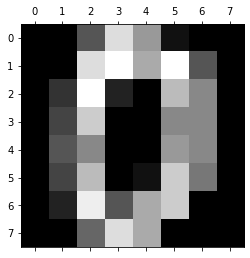

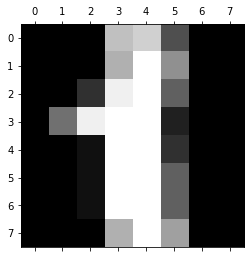

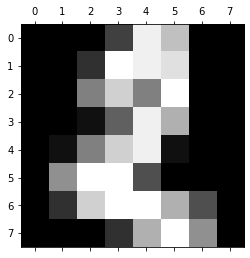

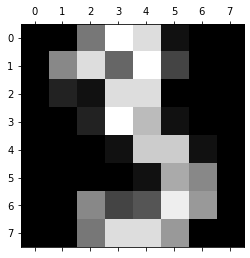

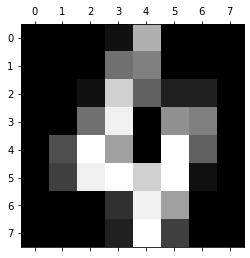

In [10]:
plt.gray()     # from the codebasics 
for i in range(0,5):
    plt.matshow(digits.images[i])

In [11]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [12]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(digits.data,digits.target)

In [16]:
X_train.shape

(1347, 64)

In [17]:
Y_train.shape

(1347,)

In [18]:
len(X_train)

1347

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
logreg.score(X_test,Y_test) # here using the X test the model predict the y_pedicted value and then
                            # calculate it with the Y_test value 

0.9688888888888889

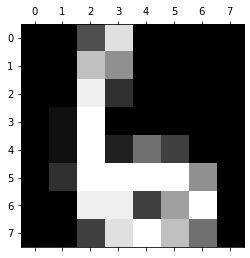

In [21]:
plt.matshow(digits.images[67])

In [23]:
digits.target[67]  # this is for what we are predicting 

6

In [20]:
logreg.predict([digits.data[67]])

array([6])

In [24]:
# first too use confusion matrix we store predicted values in y_ppred
y_pred = logreg.predict(X_test)

In [25]:
# now to know were our model is doing mistakes we use confusion matrix 
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 52,  0,  1],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 41,  1],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  1, 41]], dtype=int64)

Text(69.0, 0.5, 'True Value')

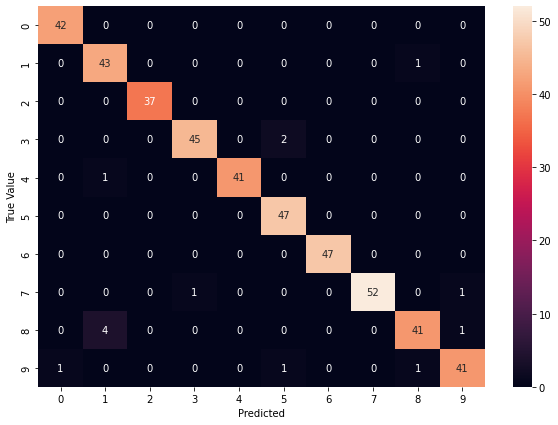

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")